# Chapter 64: Generalization Theory

### This code generates figures 5, 11 in Chapter 64: Generalization Theory (vol. III)


#### Runs simulations for Example 1 in the chapter


TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.


<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required libraries:
    
1. numpy
2. matplotlib.pyplot

In [63]:
import numpy as np
import matplotlib.pyplot as plt

## Example 64.1 (Numerical example)

In [64]:
N = 2000 # number of feature vectors
M_vec = np.array([1, 10, 50, 100, 500, 1000, 5000, 10000]) # dimension sizes
ML = np.max(M_vec.shape)

dist = np.zeros((ML,))

for m in range(ML):
    M = M_vec[m] # dimension of feature space
    print(M)
    H = np.random.rand(N, M) - 0.5*np.ones((N, M)) # N feature row vectors uniformly distributed in [-0.5,0.5]
    d_min = M * np.ones((N,))
    for n in range(N):
        h = H[n, :]
        for nn in range(N): # find minimum distance for each feature vector
            h2 = H[nn, :]
            d = np.linalg.norm(h-h2) # Euclidean distance
            if nn != n and d < d_min[n]:
                d_min[n] = d
    
    dist[m] = np.mean(d_min[:]) # average of minimum distances over all feature vectors


1
10
50
100
500
1000
5000
10000


In [66]:
# data for Table 1 of the Chapter on Generalization Theory
print(np.concatenate([M_vec.reshape(-1, 1), dist.reshape(-1, 1)], axis = 1))

[[1.00000000e+00 2.52501164e-04]
 [1.00000000e+01 4.69612923e-01]
 [5.00000000e+01 2.07221487e+00]
 [1.00000000e+02 3.28417276e+00]
 [5.00000000e+02 8.34523158e+00]
 [1.00000000e+03 1.21221406e+01]
 [5.00000000e+03 2.80924453e+01]
 [1.00000000e+04 4.00576671e+01]]


## Generates figure 5 for Vapnik-Chervonenkis biound

In [92]:
epsilon = 0.01
Nvec = np.array([10**3, 10**4, 10**5, 10**6])
Vvec = np.arange(1, 51)

L = np.max(Vvec.shape)
LN = np.max(Nvec.shape)
delta = np.zeros((LN, L))

for k in range(LN):
    N = Nvec[k]
    for i in range(L):
        v = Vvec[i]
        delat[k, i] = (32/N) * ((v * np.log(N*2.7183/v)) + (np.log(8/epsilon)))
        delta[k, i] = np.sqrt(delat[k, i])

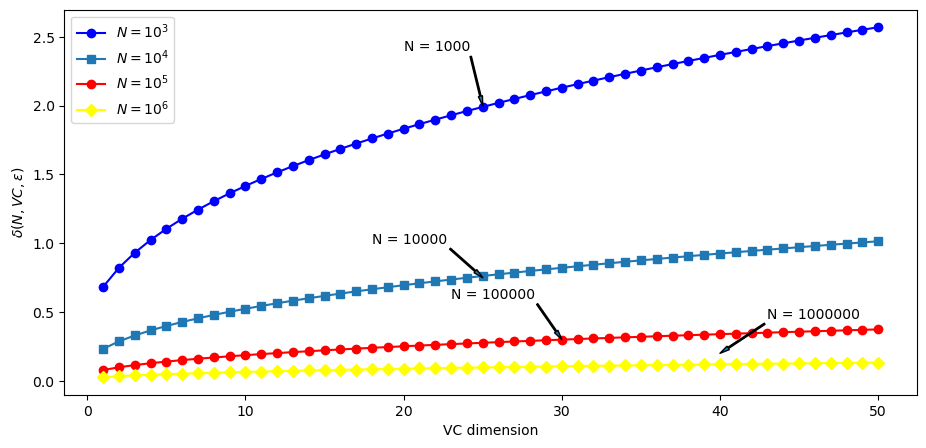

In [93]:
# figure 5 (how delta varies as a function of VC)

f1, axs1 =  plt.subplots(1, 1, figsize=(11,5))

axs1.plot(Vvec, delta[0, :], marker='o', c = 'blue')
axs1.plot(Vvec, delta[1, :], marker='s')
axs1.plot(Vvec, delta[2, :], marker='o', c = 'red')
axs1.plot(Vvec, delta[3, :], marker='D', c = 'yellow')
axs1.set_xlabel('VC dimension')
axs1.set_ylabel('$\delta(N,VC,\epsilon)$')
axs1.legend(['$N = 10^3$','$N = 10^4$','$N = 10^5$', '$N = 10^6$']);

axs1.annotate('N = 1000',xy=(25,2),xytext=(20,2.4),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('N = 10000',xy=(25,0.75),xytext=(18,1),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('N = 100000',xy=(30,0.3),xytext=(23,0.6),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('N = 1000000',xy=(40,0.2),xytext=(43,0.45),arrowprops={"width":1,"headwidth":3,'headlength':7});

# plt.savefig('fig 64.5.pdf')

(Figure 64.5)

##  Generates figure 11 comparing losses

In [95]:
n = 0
delta = 0.1
a = -1
b = 2
f_1 = np.zeros((np.arange(a, b+delta, delta).shape[0],))
f_2 = np.zeros((np.arange(a, b+delta, delta).shape[0],))
f_3 = np.zeros((np.arange(a, b+delta, delta).shape[0],))
f_4 = np.zeros((np.arange(a, b+delta, delta).shape[0],))
f_5 = np.zeros((np.arange(a, b+delta, delta).shape[0],))

for x in np.arange(a, b+delta, delta):
    f_1[n] = (1-x)**2
    f_2[n] = np.log(1+np.exp(-x))
    f_3[n] = np.exp(-x)
    f_4[n] = np.max(np.array([0, 1-x]))
    f_5[n] = np.max(np.array([0, -x]))
    n = n + 1
    

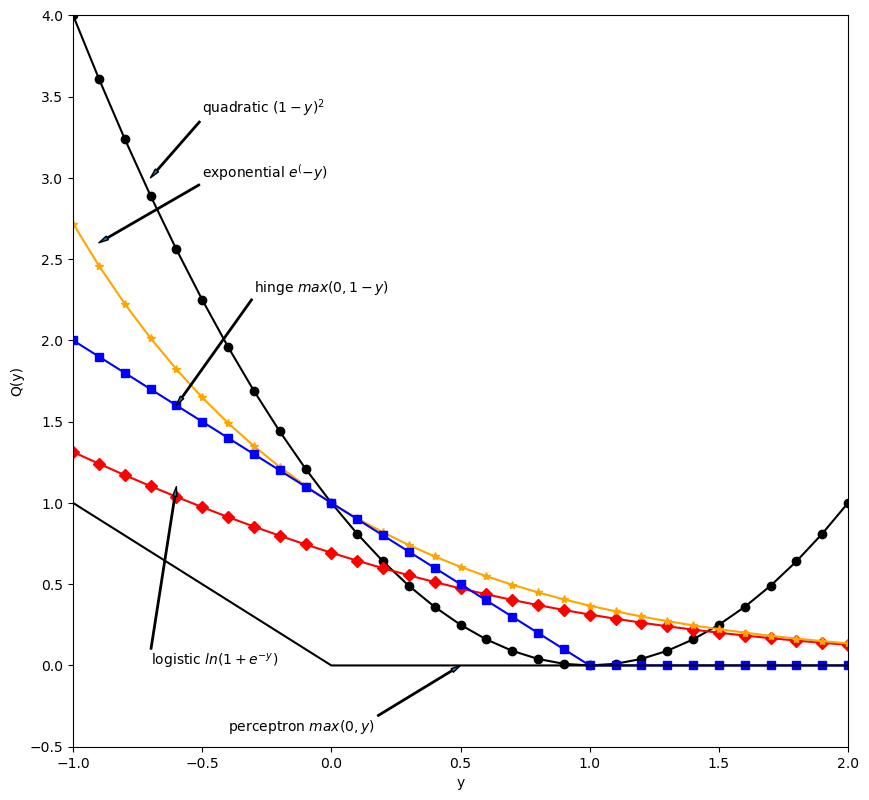

In [123]:
#figure 11 (different loss functions)

f1, axs1 =  plt.subplots(1, 1, figsize=(10,9.5))

axs1.plot(np.arange(a, b+delta, delta), f_1, marker='o', c = 'black')
axs1.plot(np.arange(a, b+delta, delta), f_2, marker='D', c = 'red')
axs1.plot(np.arange(a, b+delta, delta), f_3, marker='*', c = 'orange')
axs1.plot(np.arange(a, b+delta, delta), f_4, marker='s', c = 'blue')
axs1.plot(np.arange(a, b+delta, delta), f_5, c = 'black')

axs1.set_xlabel('y')
axs1.set_ylabel('Q(y)')
axs1.set_xlim([-1, 2])
axs1.set_ylim([-0.5, 4]);

axs1.annotate('quadratic $(1-y)^2$',xy=(-0.7,3),xytext=(-0.5,3.4),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('exponential $e^(-y)$',xy=(-0.9,2.6),xytext=(-0.5,3),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('hinge $max(0, 1-y)$',xy=(-0.6,1.6),xytext=(-0.3,2.3),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('logistic $ln(1+e^{-y})$',xy=(-0.6,1.1),xytext=(-0.7,0),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('perceptron $max(0, y)$',xy=(0.5,0),xytext=(-0.4,-0.4),arrowprops={"width":1,"headwidth":3,'headlength':7});

plt.savefig('fig 64.11.pdf')

(Figure 64.11)